In [1]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

In [2]:
import EDA_analysis as eda

# function to load the csv file

df= eda.load_data('C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-03\\data\\MachineLearningRating_v3.csv')

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-03\scripts\EDA_analysis.py:30: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, dtype=dtype_dict)


Data successfully loaded. Shape: (1000098, 52)


In [3]:
# cheking for missing values
eda.data_quality_assessment(df)


Missing Values:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [4]:
#handled the missing value
data = eda.handle_missing_values(df)
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 UnderwrittenCoverID          0
PolicyID                     0
TransactionMonth             0
IsVATRegistered              0
Citizenship                  0
                            ..
Product_missing              0
StatutoryClass_missing       0
StatutoryRiskType_missing    0
TotalPremium_missing         0
TotalClaims_missing          0
Length: 92, dtype: int64


In [5]:
# import hypothesis testing module
import AB_hypothesis as abh

# test if there are significant risk differences (Total Claims) across provinces
abh.test_risk_across_provinces(data)

{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences across provinces',
 'F-Statistic': np.float64(5.849413762407606),
 'p-Value': np.float64(1.6782057588675903e-07),
 'Reject Null': np.True_}

In [6]:
# Test if there are significant risk differences (Total Claims) between ZIP codes
abh.test_risk_between_zipcodes(data)

{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences between ZIP codes',
 'F-Statistic': np.float64(0.9419762214391849),
 'p-Value': np.float64(0.8906511279164051),
 'Reject Null': np.False_}

In [7]:
# Test if there are significant margin differences (Profit Margin) between ZIP codes
abh.test_margin_difference_between_zipcodes(data)

{'Test': 'ANOVA',
 'Null Hypothesis': 'No significant margin differences between ZIP codes',
 'F-Statistic': np.float64(0.7707184576959515),
 'p-Value': np.float64(0.9999998177863838),
 'Reject Null': np.False_}

In [8]:
# Test if there are significant risk differences (Total Claims) between genders
abh.test_risk_difference_gender(data)

{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': np.float64(-0.296353891400699),
 'p-Value': np.float64(0.7669656471629474),
 'Reject Null': np.False_}

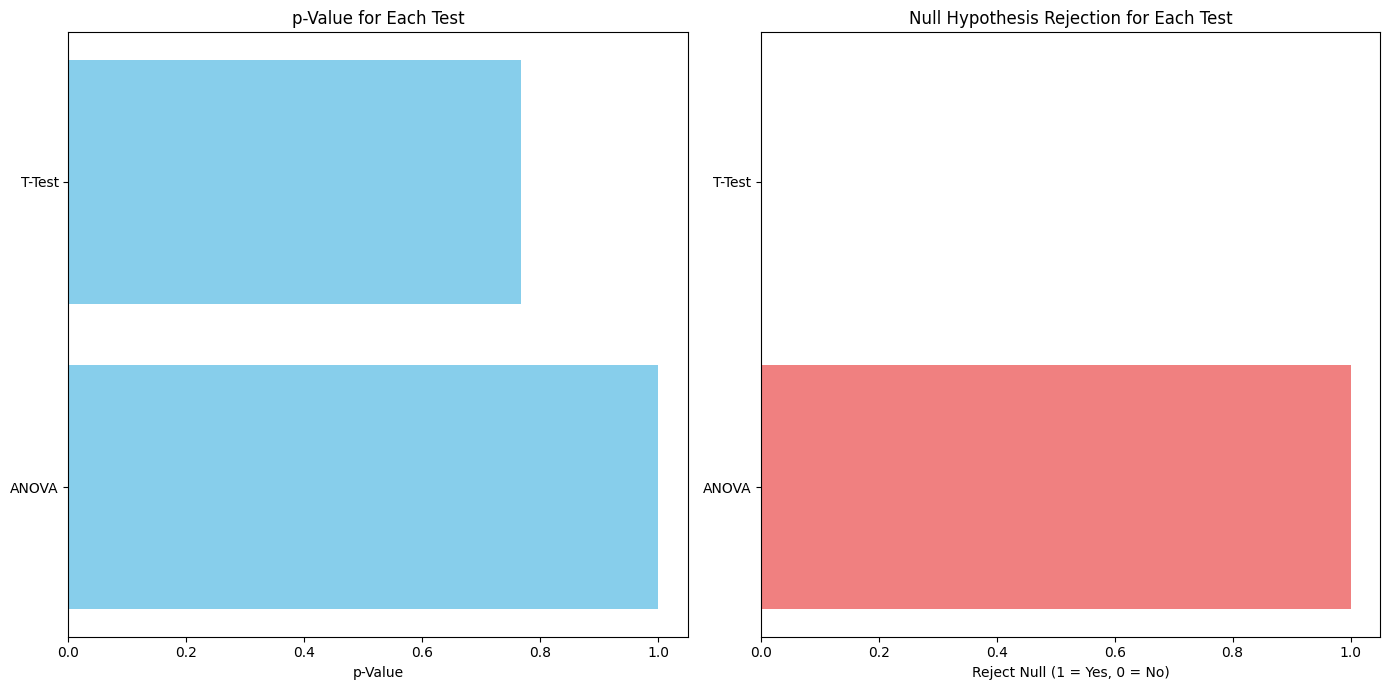

,Test,Null Hypothesis,F-Statistic,p-Value,Reject Null,T-Statistic
0,ANOVA,No risk differences across provinces,5.849414,1.678206e-07,True,NaN
1,ANOVA,No risk differences between ZIP codes,0.941976,8.906511e-01,False,NaN
2,ANOVA,No significant margin differences between ZIP ...,0.770718,9.999998e-01,False,NaN
3,T-Test,No significant risk differences between women ...,NaN,7.669656e-01,False,-0.296354


In [9]:
# Run all hypothesis tests and visualize results
abh.run_all_tests(data)